<a href="https://colab.research.google.com/github/MichelleCid/Trabajo-Final-Finanzas-III-Antican-Cid-Marchant-/blob/main/Trabajo_Final_Finanzas_III_(Antican%2C_Cid%2C_Marchant).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabajo Final Finanzas III**

Integrantes: Bianca Antican, Michelle Cid y Martina Marchant.



Ejercicio 1 - Valor del bono: sacado del libro Hull
Valor presente del bono: $103.54

Ejercicio 2 - Valor de la acción: sacado del libro Hull
Valor estimado de la acción: $60.00

Ejercicio 3 - Valor del futuro: sacado del libro Hull
Valor teórico del futuro: $51.52

Ejercicio 4.1 - Tipo de cambio forward: sacado del libro Hull
Tipo de cambio forward estimado: 1.6161

Ejercicio 4.2 - Valor del contrato forward: sacado del libro Hull
Valor del contrato forward: $-3.88

Ejercicio 5 - Valor de la opción Call: sacado del libro Hull
Valor de la opción call: $3.69

Ejercicio 6 - Valor del swap tasa flotante - fija: sacado del libro Hull
Valor del swap: $-1,500,000.00

Ejercicio 7 - Valor estimado de la tasa FRA 3x6: sacado del libro Hull
Tasa FRA 3x6 estimada: 5.94%



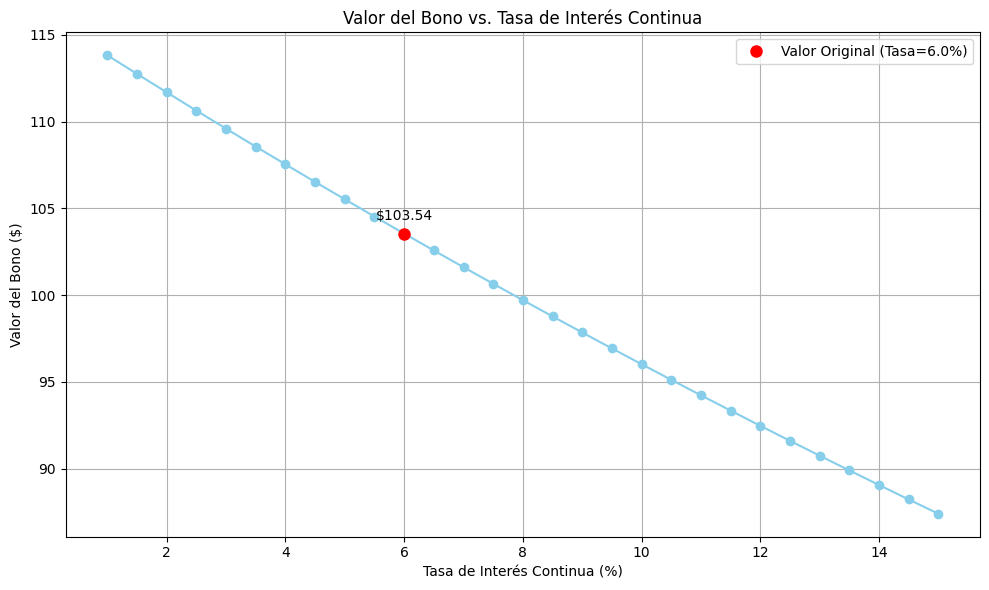

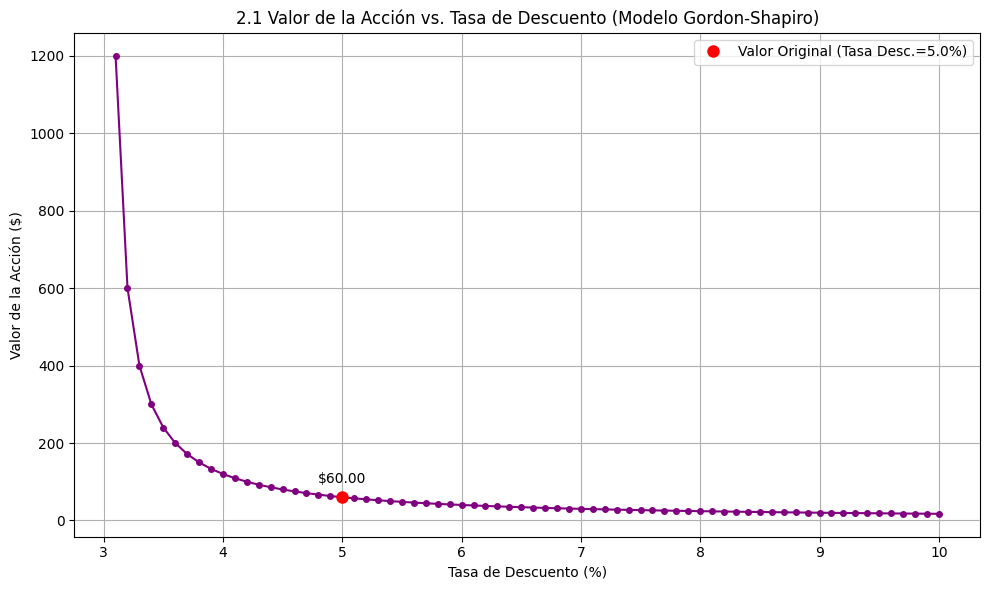

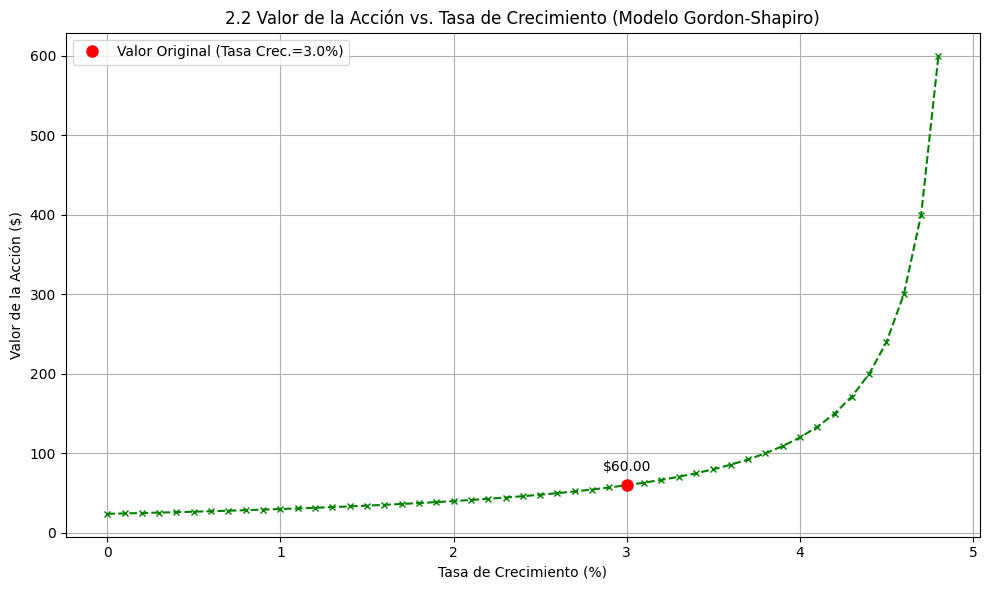

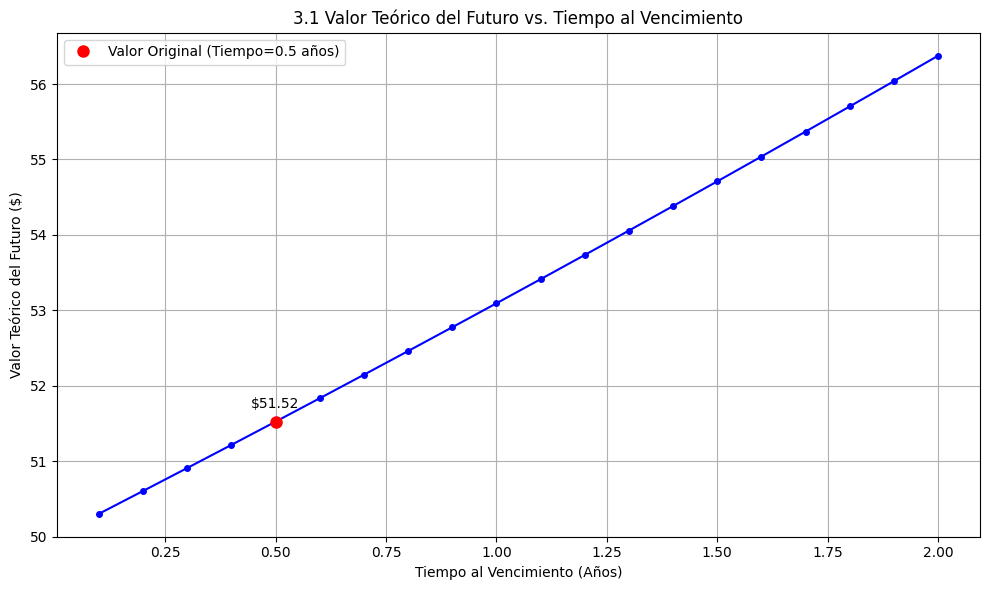

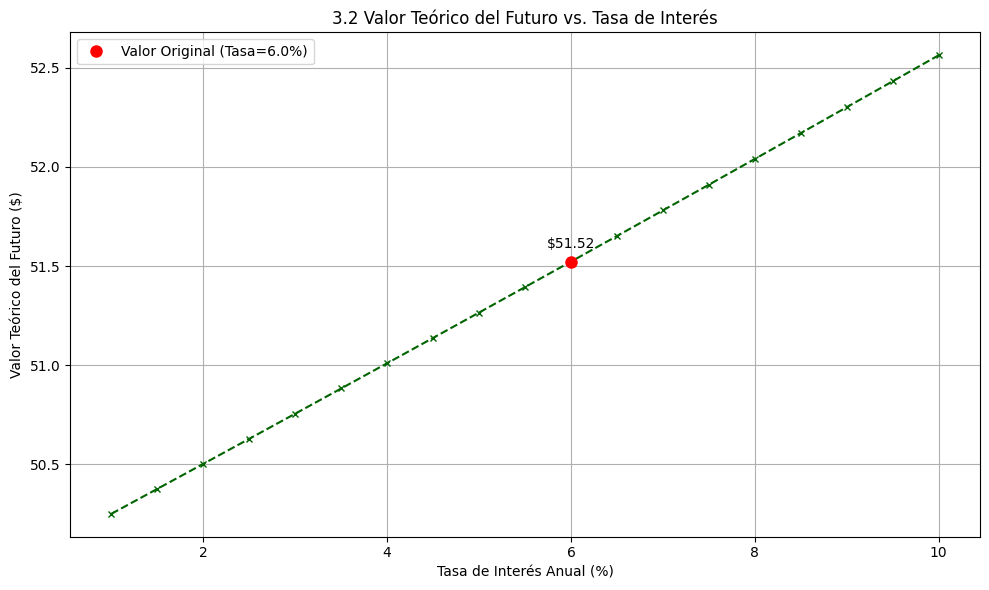

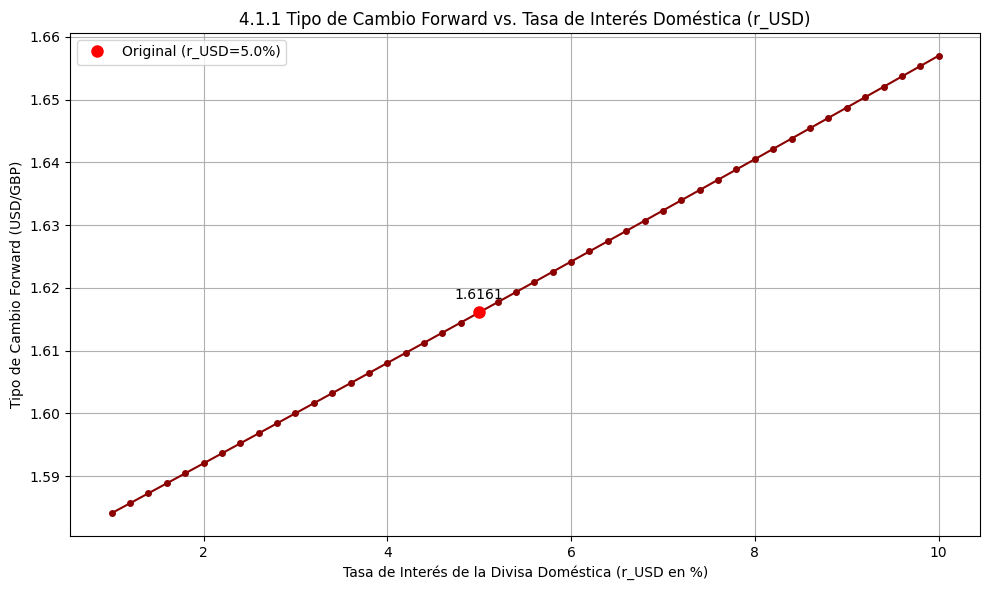

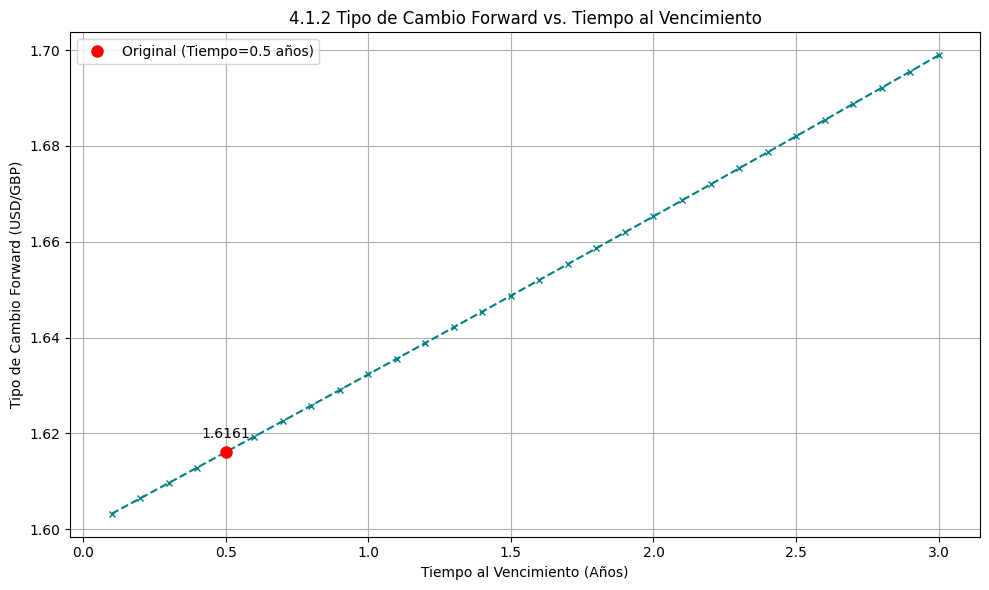

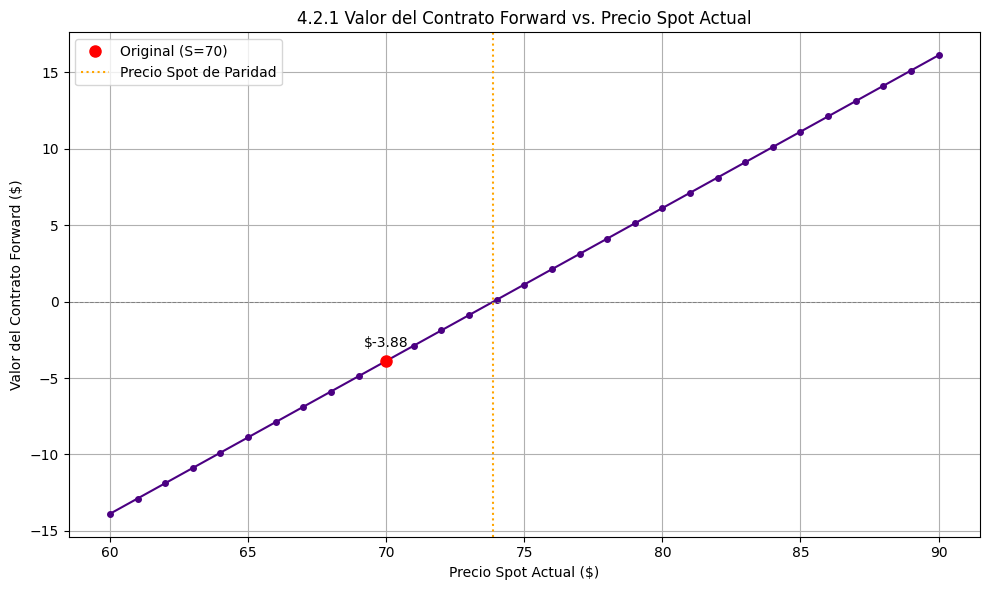

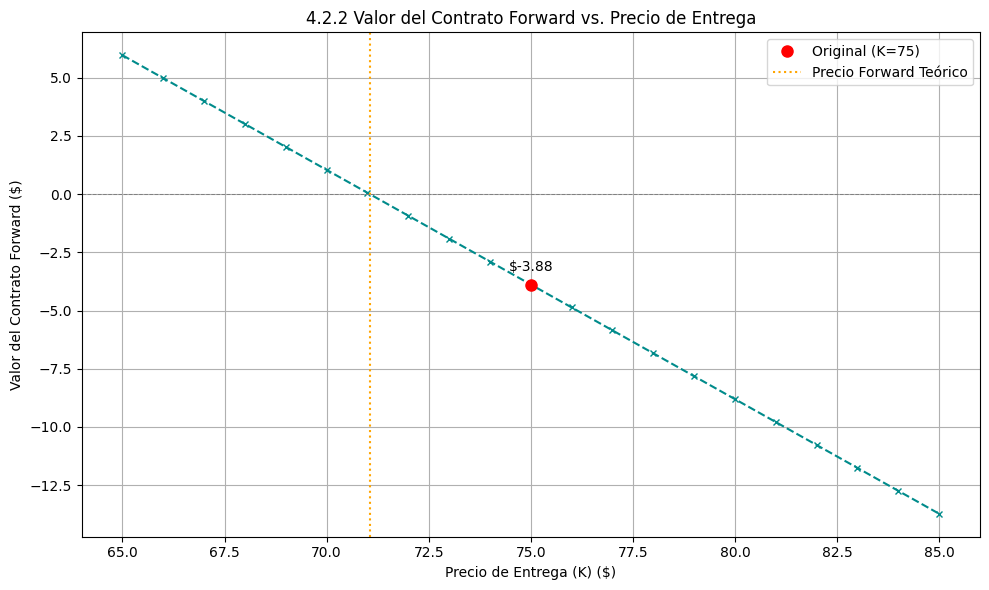

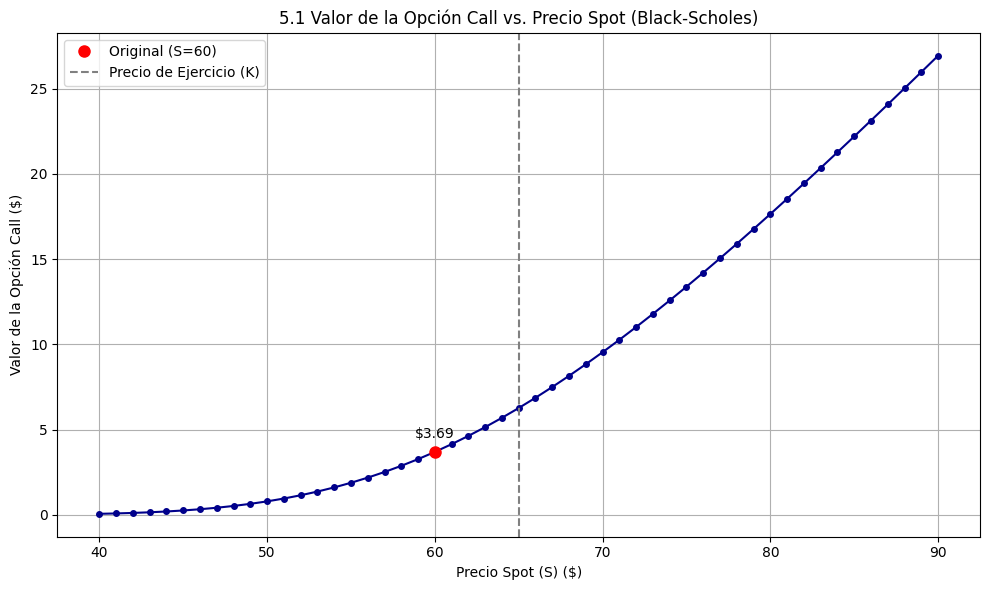

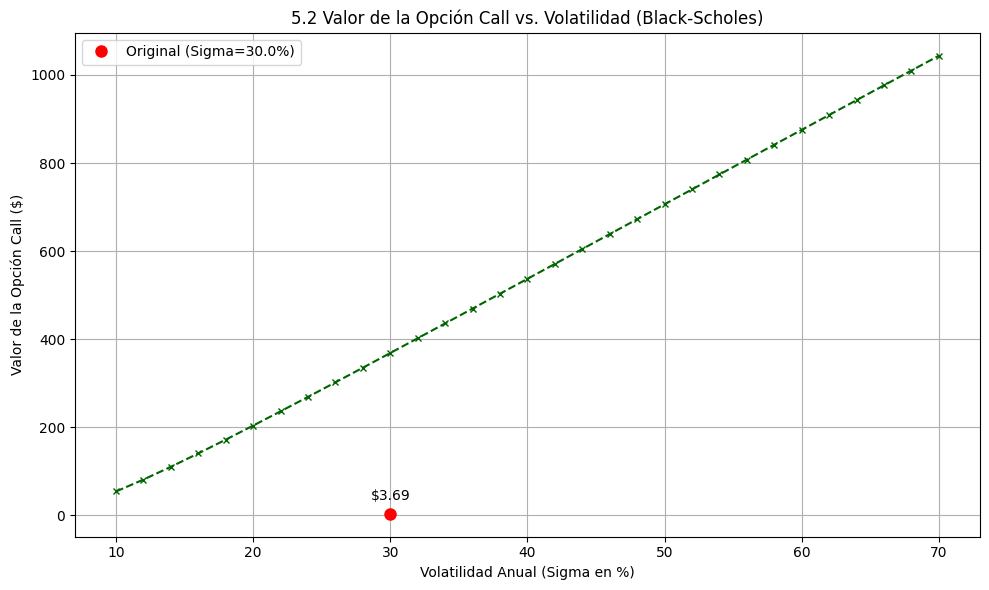

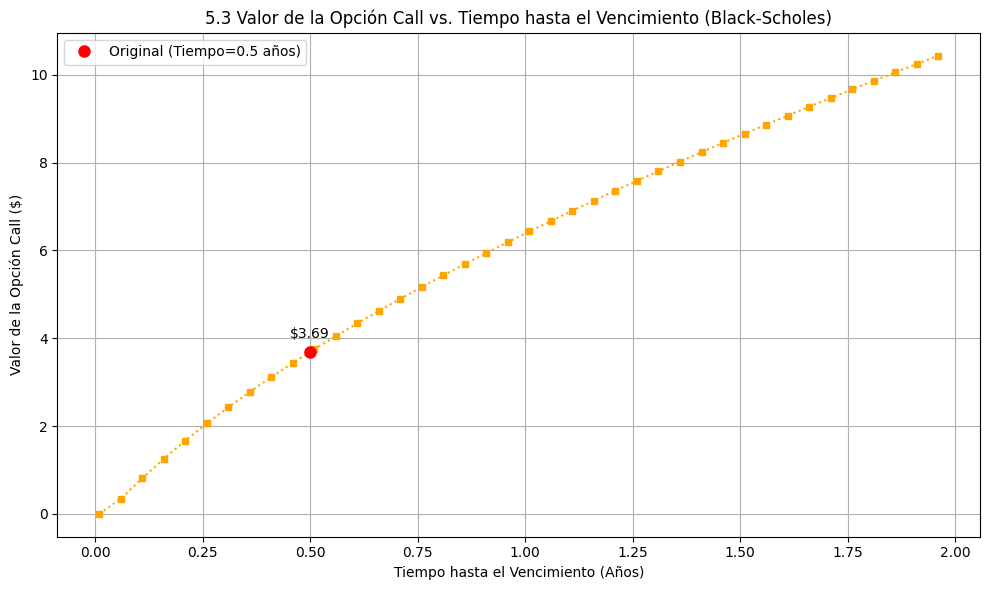

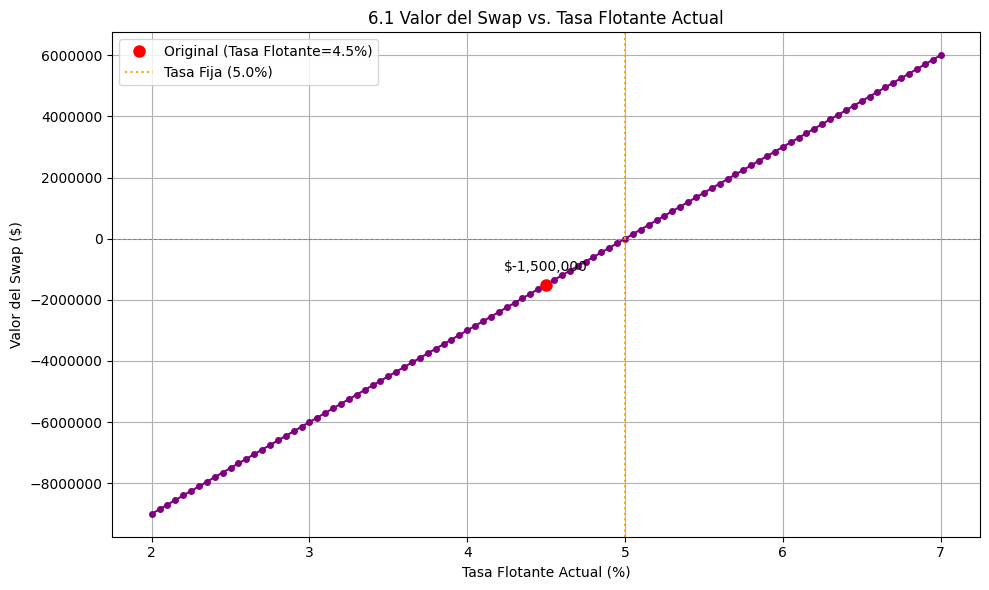

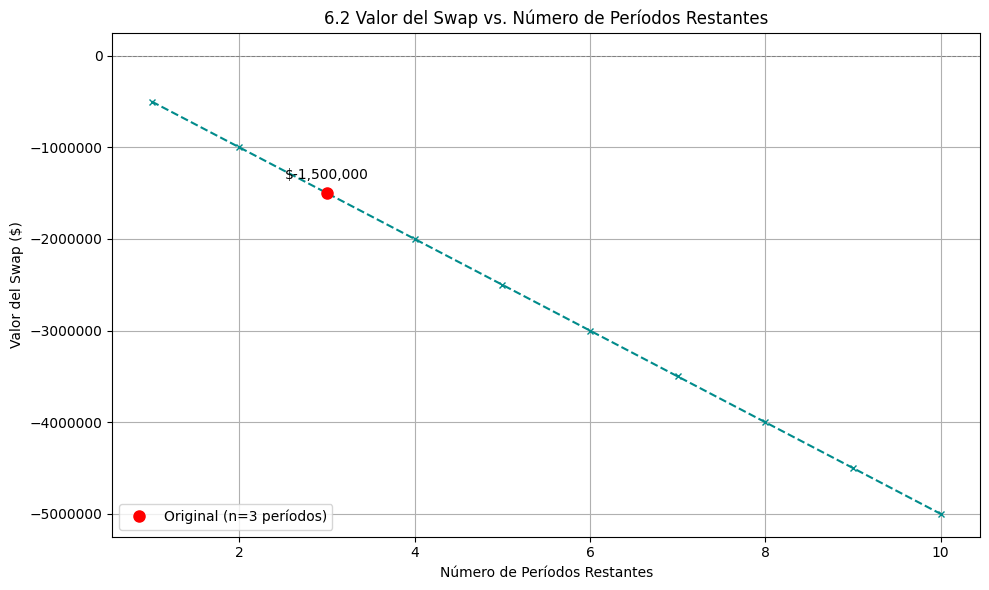

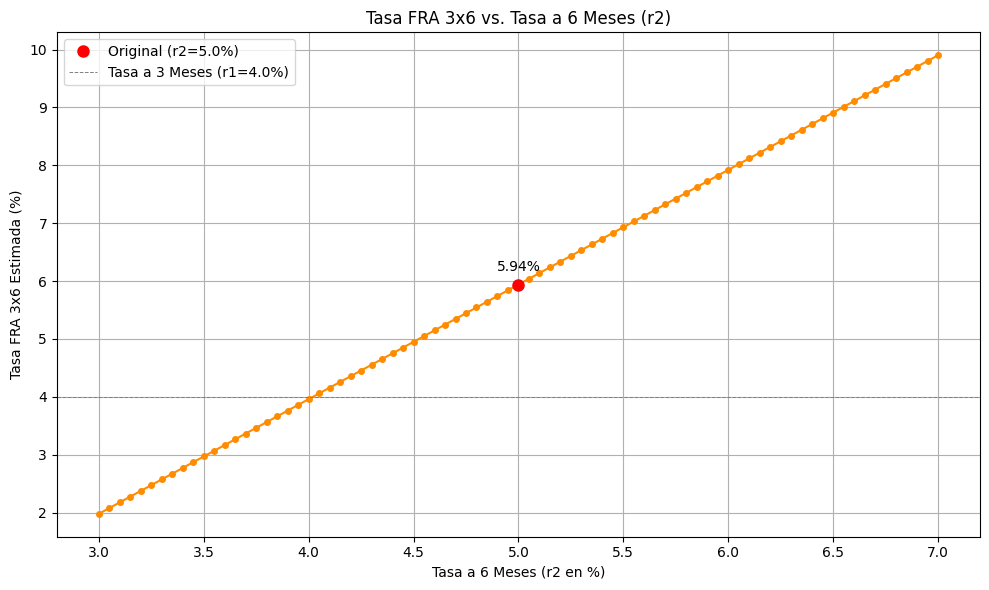

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Instalación necesaria
!pip install fpdf --quiet

import math
from scipy.stats import norm
from google.colab import files, drive
from fpdf import FPDF
import matplotlib.pyplot as plt
import numpy as np
import os

# EJERCICIOS:

# 1) VALORIZACIÓN DE BONOS
print("Ejercicio 1 - Valor del bono: sacado del libro Hull")
def valor_bono_continuo(cupon_anual, tasa_continua, años, valor_nominal, frecuencia=2):
    cupon_semestral = cupon_anual / frecuencia
    t = [i / frecuencia for i in range(1, años * frecuencia + 1)]
    valor_presente_cupones = sum(cupon_semestral * math.exp(-tasa_continua * ti) for ti in t)
    valor_presente_nominal = valor_nominal * math.exp(-tasa_continua * años)
    return valor_presente_cupones + valor_presente_nominal

# Datos del ejercicio
cupon_anual = 8   # 8% sobre valor nominal de 100
tasa_continua = 0.06
años = 2
valor_nominal = 100

valor_bono = valor_bono_continuo(cupon_anual, tasa_continua, años, valor_nominal)
print(f"Valor presente del bono: ${valor_bono:.2f}\n")

# 2) VALORIZACIÓN DE ACCIONES (Gordon-Shapiro)
print("Ejercicio 2 - Valor de la acción: sacado del libro Hull")
def valor_accion(dividendo, tasa_crecimiento, tasa_descuento):
    if tasa_descuento <= tasa_crecimiento:
        # Maneja el caso límite donde el modelo no es aplicable
        return float('nan') # Retorna "No es un Número" para casos inválidos
    return dividendo / (tasa_descuento - tasa_crecimiento)

# Datos del ejercicio original
dividendo_ejercicio = 40 * 0.03  # Dividendos continuos esperados (3% de 40)
tasa_crecimiento_ejercicio = 0.03
tasa_descuento_ejercicio = 0.05

accion_valor = valor_accion(dividendo_ejercicio, tasa_crecimiento_ejercicio, tasa_descuento_ejercicio) # Calculate accion_valor here
print(f"Valor estimado de la acción: ${accion_valor:.2f}\n")

# 3) VALORIZACIÓN DE FUTUROS
print("Ejercicio 3 - Valor del futuro: sacado del libro Hull")
def valor_futuro(valor_presente, tasa_interes, tiempo):
    return valor_presente * math.exp(tasa_interes * tiempo)

# Datos del ejercicio
valor_presente = 50
tasa_interes_futuro = 0.06
tiempo = 0.5  # 6 meses
futuro_valor = valor_futuro(valor_presente, tasa_interes_futuro, tiempo)

print(f"Valor teórico del futuro: ${futuro_valor:.2f}\n")

# 4.1) TIPO DE CAMBIO FORWARD
print("Ejercicio 4.1 - Tipo de cambio forward: sacado del libro Hull")
def calcular_forward(S, r_d, r_f, T):
    return S * math.exp((r_d - r_f) * T)

# Datos del ejercicio
spot = 1.60
r_usd = 0.05
r_gbp = 0.03
T_forward = 0.5
forward_fx = calcular_forward(spot, r_usd, r_gbp, T_forward)

print(f"Tipo de cambio forward estimado: {forward_fx:.4f}\n")

# 4.2) VALOR DEL CONTRATO FORWARD
print("Ejercicio 4.2 - Valor del contrato forward: sacado del libro Hull")
def valor_contrato_forward(S, K, r, T):
    return S - K * math.exp(-r * T)

# Datos del ejercicio
S_actual = 70
K_forward = 75
r = 0.06
T_remanente = 0.25
valor_forward = valor_contrato_forward(S_actual, K_forward, r, T_remanente)

print(f"Valor del contrato forward: ${valor_forward:.2f}\n")

# 5) VALOR DE LA OPCIÓN CALL (Black-Scholes)
print("Ejercicio 5 - Valor de la opción Call: sacado del libro Hull")
def valor_opcion_call(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)

# Datos del ejercicio
S_call = 60
K = 65
T_call = 0.5
r_call = 0.05
sigma = 0.30
call_valor = valor_opcion_call(S_call, K, T_call, r_call, sigma)

print(f"Valor de la opción call: ${call_valor:.2f}\n")

# 6) VALOR DE SWAP
print("Ejercicio 6 - Valor del swap tasa flotante - fija: sacado del libro Hull")
def valor_swap(notional, fixed_rate, floating_rate, n):
    return notional * (floating_rate - fixed_rate) * n

# Datos del ejercicio
notional = 100_000_000
fixed_rate = 0.05
floating_rate = 0.045
n = 3
swap_valor = notional * (floating_rate - fixed_rate) * n

print(f"Valor del swap: ${swap_valor:,.2f}\n")

# 7) VALOR TASA FRA 3x6
print("Ejercicio 7 - Valor estimado de la tasa FRA 3x6: sacado del libro Hull")
def calcular_fra(r1, r2):
    return ((1 + r2 * 0.5) / (1 + r1 * 0.25) - 1) / 0.25

#Datos del ejercicio
r1 = 0.04  # tasa 3 meses
r2 = 0.05  # tasa 6 meses
fra_valor = calcular_fra(r1, r2)

print(f"Tasa FRA 3x6 estimada: {fra_valor * 100:.2f}%\n")

#DATOS REALES PROPORCIONADOS
# Estos son los resultados que quieres mostrar y graficar
valor_bono = 103.54
accion_valor = 60.00
futuro_valor = 51.52
forward_fx = 1.6161
valor_forward = -3.88
call_valor = 3.69
swap_valor = -1_500_000.00
fra_valor = 0.0594  # 5.94%

#GENERAR GRÁFICOS

# 1) Gráfico sensibilidad del valor del bono a la tasa de interes.
# Tu función existente de valoración de bonos
def valor_bono_continuo(cupon_anual, tasa_continua, años, valor_nominal, frecuencia=2):
    cupon_semestral = cupon_anual / frecuencia
    t = [i / frecuencia for i in range(1, años * frecuencia + 1)]
    valor_presente_cupones = sum(cupon_semestral * math.exp(-tasa_continua * ti) for ti in t)
    valor_presente_nominal = valor_nominal * math.exp(-tasa_continua * años)
    return valor_presente_cupones + valor_presente_nominal

# Datos del ejercicio (sin cambios)
cupon_anual = 8  # 8% sobre valor nominal de 100
años = 2
valor_nominal = 100

# Define un rango de tasas de interés continuas (ej. del 1% al 15%)
# Multiplicamos por 100 para que el eje x muestre porcentajes
tasas_interes = [i / 1000 for i in range(10, 151, 5)]  # Desde 0.01 (1%) hasta 0.15 (15%) en pasos de 0.005 (0.5%)

# Calcula los valores del bono para cada tasa de interés
valores_bono = [valor_bono_continuo(cupon_anual, tasa, años, valor_nominal) for tasa in tasas_interes]

# Trazar los datos
plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura para una mejor legibilidad
plt.plot([tasa * 100 for tasa in tasas_interes], valores_bono, marker='o', linestyle='-', color='skyblue')

# Añadir el punto del valor original del bono de tu ejercicio
original_tasa = 0.06
original_valor = valor_bono_continuo(cupon_anual, original_tasa, años, valor_nominal)
plt.plot(original_tasa * 100, original_valor, 'ro', markersize=8, label=f'Valor Original (Tasa={original_tasa*100:.1f}%)')
plt.annotate(f'${original_valor:.2f}', (original_tasa * 100, original_valor),
             textcoords="offset points", xytext=(0,10), ha='center')

# Añadir etiquetas y título para mayor claridad
plt.title('Valor del Bono vs. Tasa de Interés Continua')
plt.xlabel('Tasa de Interés Continua (%)')
plt.ylabel('Valor del Bono ($)')
plt.grid(True) # Añade una cuadrícula para facilitar la lectura
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.legend()
plt.savefig("grafico_1_ejercicio_1.png") # Save the plot
plt.show()

# 2) Gráfico Valor de la acción.
# Gráfico 1: Valor de la Acción vs. Tasa de Descuento
# Rango de tasas de descuento, asegurando que sea mayor que la tasa de crecimiento
tasas_descuento_rango = [i / 1000 for i in range(int(tasa_crecimiento_ejercicio*1000) + 1, 101, 1)] # Desde (crecimiento + 0.1%) hasta 10%
valores_accion_por_descuento = []

for td in tasas_descuento_rango:
    valores_accion_por_descuento.append(valor_accion(dividendo_ejercicio, tasa_crecimiento_ejercicio, td))

plt.figure(figsize=(10, 6))
plt.plot([td * 100 for td in tasas_descuento_rango], valores_accion_por_descuento, marker='o', linestyle='-', color='purple', markersize=4)

# Marcar el punto del ejercicio original
valor_original_descuento = valor_accion(dividendo_ejercicio, tasa_crecimiento_ejercicio, tasa_descuento_ejercicio)
if not math.isnan(valor_original_descuento): # Asegura que el punto original sea válido
    plt.plot(tasa_descuento_ejercicio * 100, valor_original_descuento, 'ro', markersize=8, label=f'Valor Original (Tasa Desc.={tasa_descuento_ejercicio*100:.1f}%)')
    plt.annotate(f'${valor_original_descuento:.2f}', (tasa_descuento_ejercicio * 100, valor_original_descuento),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.title('2.1 Valor de la Acción vs. Tasa de Descuento (Modelo Gordon-Shapiro)')
plt.xlabel('Tasa de Descuento (%)')
plt.ylabel('Valor de la Acción ($)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("grafico_1_ejercicio_2.png") # Save the plot
plt.show()

# Gráfico 2: Valor de la Acción vs. Tasa de Crecimiento
# Rango de tasas de crecimiento, asegurando que sea menor que la tasa de descuento
tasas_crecimiento_rango = [i / 1000 for i in range(0, int(tasa_descuento_ejercicio*1000) - 1, 1)] # Desde 0% hasta (descuento - 0.1%)
valores_accion_por_crecimiento = []

for tc in tasas_crecimiento_rango:
    valores_accion_por_crecimiento.append(valor_accion(dividendo_ejercicio, tc, tasa_descuento_ejercicio))

plt.figure(figsize=(10, 6))
plt.plot([tc * 100 for tc in tasas_crecimiento_rango], valores_accion_por_crecimiento, marker='x', linestyle='--', color='green', markersize=4)

# Marcar el punto del ejercicio original
valor_original_crecimiento = valor_accion(dividendo_ejercicio, tasa_crecimiento_ejercicio, tasa_descuento_ejercicio)
if not math.isnan(valor_original_crecimiento): # Asegura que el punto original sea válido
    plt.plot(tasa_crecimiento_ejercicio * 100, valor_original_crecimiento, 'ro', markersize=8, label=f'Valor Original (Tasa Crec.={tasa_crecimiento_ejercicio*100:.1f}%)')
    plt.annotate(f'${valor_original_crecimiento:.2f}', (tasa_crecimiento_ejercicio * 100, valor_original_crecimiento),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.title('2.2 Valor de la Acción vs. Tasa de Crecimiento (Modelo Gordon-Shapiro)')
plt.xlabel('Tasa de Crecimiento (%)')
plt.ylabel('Valor de la Acción ($)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("grafico_2_ejercicio_2.png") # Save the plot
plt.show()

# 3) Gráfico Valor del futuro
# Gráfico 1: Valor del Futuro vs. Tiempo al Vencimiento.
# Rango de tiempo al vencimiento (ej. de 0.1 a 2 años)
tiempo_rango = [i / 10 for i in range(1, 21, 1)] # Desde 0.1 hasta 2.0 años en pasos de 0.1
valores_futuro_por_tiempo = []

valor_presente_ejercicio = 50
tasa_interes_futuro_ejercicio = 0.06
tiempo_ejercicio = 0.5
futuro_valor_original = valor_futuro(valor_presente_ejercicio, tasa_interes_futuro_ejercicio, tiempo_ejercicio)


for t in tiempo_rango:
    valores_futuro_por_tiempo.append(valor_futuro(valor_presente_ejercicio, tasa_interes_futuro_ejercicio, t))

plt.figure(figsize=(10, 6))
plt.plot(tiempo_rango, valores_futuro_por_tiempo, marker='o', linestyle='-', color='blue', markersize=4)

# Marcar el punto del ejercicio original
plt.plot(tiempo_ejercicio, futuro_valor_original, 'ro', markersize=8, label=f'Valor Original (Tiempo={tiempo_ejercicio} años)')
plt.annotate(f'${futuro_valor_original:.2f}', (tiempo_ejercicio, futuro_valor_original),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.title('3.1 Valor Teórico del Futuro vs. Tiempo al Vencimiento')
plt.xlabel('Tiempo al Vencimiento (Años)')
plt.ylabel('Valor Teórico del Futuro ($)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("grafico_1_ejercicio_3.png") # Save the plot
plt.show()

#Gráfico 2: Valor del Futuro vs. Tasa de Interés.
# Rango de tasas de interés (ej. de 1% a 10%)
tasas_interes_rango = [i / 1000 for i in range(10, 101, 5)] # Desde 0.01 (1%) hasta 0.10 (10%) en pasos de 0.005
valores_futuro_por_tasa = []

for r in tasas_interes_rango:
    valores_futuro_por_tasa.append(valor_futuro(valor_presente_ejercicio, r, tiempo_ejercicio))

plt.figure(figsize=(10, 6))
plt.plot([r * 100 for r in tasas_interes_rango], valores_futuro_por_tasa, marker='x', linestyle='--', color='darkgreen', markersize=4)

# Marcar el punto del ejercicio original
plt.plot(tasa_interes_futuro_ejercicio * 100, futuro_valor_original, 'ro', markersize=8, label=f'Valor Original (Tasa={tasa_interes_futuro_ejercicio*100:.1f}%)')
plt.annotate(f'${futuro_valor_original:.2f}', (tasa_interes_futuro_ejercicio * 100, futuro_valor_original),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.title('3.2 Valor Teórico del Futuro vs. Tasa de Interés')
plt.xlabel('Tasa de Interés Anual (%)')
plt.ylabel('Valor Teórico del Futuro ($)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("grafico_2_ejercicio_3.png") # Save the plot
plt.show()

# 4.1) Gráfico Tipo de cambio forward
# Gráfico 1: Tipo de Cambio Forward vs. Tasa de Interés de la Divisa Doméstica (r_usd)
# Variando r_usd para observar el efecto del diferencial de tasas
r_usd_rango = [i / 1000 for i in range(10, 101, 2)] # De 0.01 (1%) a 0.10 (10%)
forward_fx_por_r_usd = []

spot_ejercicio = 1.60
r_usd_ejercicio = 0.05
r_gbp_ejercicio = 0.03
T_forward_ejercicio = 0.5
forward_fx_original = calcular_forward(spot_ejercicio, r_usd_ejercicio, r_gbp_ejercicio, T_forward_ejercicio)


for r_d_val in r_usd_rango:
    forward_fx_por_r_usd.append(calcular_forward(spot_ejercicio, r_d_val, r_gbp_ejercicio, T_forward_ejercicio))

plt.figure(figsize=(10, 6))
plt.plot([r_usd_val * 100 for r_usd_val in r_usd_rango], forward_fx_por_r_usd, marker='o', linestyle='-', color='darkred', markersize=4)

# Marcar el punto del ejercicio original
plt.plot(r_usd_ejercicio * 100, forward_fx_original, 'ro', markersize=8, label=f'Original (r_USD={r_usd_ejercicio*100:.1f}%)')
plt.annotate(f'{forward_fx_original:.4f}', (r_usd_ejercicio * 100, forward_fx_original),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.title('4.1.1 Tipo de Cambio Forward vs. Tasa de Interés Doméstica (r_USD)')
plt.xlabel('Tasa de Interés de la Divisa Doméstica (r_USD en %)')
plt.ylabel('Tipo de Cambio Forward (USD/GBP)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("grafico_1_ejercicio_4.1.png") # Save the plot
plt.show()

#Gráfico 2: Tipo de Cambio Forward vs. Tiempo al Vencimiento (T)
# Variando el tiempo al vencimiento
tiempo_rango = [i / 10 for i in range(1, 31, 1)] # Desde 0.1 hasta 3.0 años en pasos de 0.1
forward_fx_por_tiempo = []

for T_val in tiempo_rango:
    forward_fx_por_tiempo.append(calcular_forward(spot_ejercicio, r_usd_ejercicio, r_gbp_ejercicio, T_val))

plt.figure(figsize=(10, 6))
plt.plot(tiempo_rango, forward_fx_por_tiempo, marker='x', linestyle='--', color='teal', markersize=4)

# Marcar el punto del ejercicio original
plt.plot(T_forward_ejercicio, forward_fx_original, 'ro', markersize=8, label=f'Original (Tiempo={T_forward_ejercicio} años)')
plt.annotate(f'{forward_fx_original:.4f}', (T_forward_ejercicio, forward_fx_original),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.title('4.1.2 Tipo de Cambio Forward vs. Tiempo al Vencimiento')
plt.xlabel('Tiempo al Vencimiento (Años)')
plt.ylabel('Tipo de Cambio Forward (USD/GBP)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("grafico_2_ejercicio_4.1.png") # Save the plot
plt.show()

# 4.2) Gráfico Valor contrato forward
# Gráfico 1: Valor del Contrato Forward vs. Precio Spot Actual (S)
# Rango para el precio spot actual (ej. de 60 a 90)
s_rango = [i for i in range(60, 91, 1)]
valores_contrato_por_s = []

S_actual_ejercicio = 70
K_forward_ejercicio = 75
r_ejercicio = 0.06
T_remanente_ejercicio = 0.25
valor_forward_original = valor_contrato_forward(S_actual_ejercicio, K_forward_ejercicio, r_ejercicio, T_remanente_ejercicio)


for s_val in s_rango:
    valores_contrato_por_s.append(valor_contrato_forward(s_val, K_forward_ejercicio, r_ejercicio, T_remanente_ejercicio))

plt.figure(figsize=(10, 6))
plt.plot(s_rango, valores_contrato_por_s, marker='o', linestyle='-', color='indigo', markersize=4)

# Marcar el punto del ejercicio original
plt.plot(S_actual_ejercicio, valor_forward_original, 'ro', markersize=8, label=f'Original (S={S_actual_ejercicio})')
plt.annotate(f'${valor_forward_original:.2f}', (S_actual_ejercicio, valor_forward_original),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.title('4.2.1 Valor del Contrato Forward vs. Precio Spot Actual')
plt.xlabel('Precio Spot Actual ($)')
plt.ylabel('Valor del Contrato Forward ($)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7) # Línea en y=0 para mostrar el "break-even"
# La línea vertical naranja indica el valor de S para el cual el contrato valdría 0 hoy
# (cuando S = K * exp(-rT), que es el valor teórico del forward hoy)
plt.axvline(K_forward_ejercicio * math.exp(-r_ejercicio * T_remanente_ejercicio), color='orange', linestyle=':', label='Precio Spot de Paridad')
plt.tight_layout()
plt.legend()
plt.savefig("grafico_1_ejercicio_4.2.png") # Save the plot
plt.show()

# Gráfico 2: Valor del Contrato Forward vs. Precio de Entrega (K)
# Rango para el precio de entrega (ej. de 65 a 85)
k_rango = [i for i in range(65, 86, 1)]
valores_contrato_por_k = []

for k_val in k_rango:
    valores_contrato_por_k.append(valor_contrato_forward(S_actual_ejercicio, k_val, r_ejercicio, T_remanente_ejercicio))

plt.figure(figsize=(10, 6))
plt.plot(k_rango, valores_contrato_por_k, marker='x', linestyle='--', color='darkcyan', markersize=4)

# Marcar el punto del ejercicio original
plt.plot(K_forward_ejercicio, valor_forward_original, 'ro', markersize=8, label=f'Original (K={K_forward_ejercicio})')
plt.annotate(f'${valor_forward_original:.2f}', (K_forward_ejercicio, valor_forward_original),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.title('4.2.2 Valor del Contrato Forward vs. Precio de Entrega')
plt.xlabel('Precio de Entrega (K) ($)')
plt.ylabel('Valor del Contrato Forward ($)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7) # Línea en y=0
# La línea vertical naranja indica el valor de K para el cual el contrato valdría 0 hoy
# (cuando K = S / exp(-rT) = S * exp(rT), que es el precio forward teórico)
plt.axvline(S_actual_ejercicio * math.exp(r_ejercicio * T_remanente_ejercicio), color='orange', linestyle=':', label='Precio Forward Teórico')
plt.tight_layout()
plt.legend()
plt.savefig("grafico_2_ejercicio_4.2.png") # Save the plot
plt.show()

# 5) Gráfico Valor opción call
# Gráfico 1: Valor de la Opción Call vs. Precio Spot (S)
s_rango = [i for i in range(40, 91, 1)] # Rango de precios spot
valores_call_por_s = []

S_call_ejercicio = 60
K_ejercicio = 65
T_call_ejercicio = 0.5
r_call_ejercicio = 0.05
sigma_ejercicio = 0.30
call_valor_original = valor_opcion_call(S_call_ejercicio, K_ejercicio, T_call_ejercicio, r_call_ejercicio, sigma_ejercicio)


for s_val in s_rango:
    valores_call_por_s.append(valor_opcion_call(s_val, K_ejercicio, T_call_ejercicio, r_call_ejercicio, sigma_ejercicio))

plt.figure(figsize=(10, 6))
plt.plot(s_rango, valores_call_por_s, marker='o', linestyle='-', color='darkblue', markersize=4)

plt.plot(S_call_ejercicio, call_valor_original, 'ro', markersize=8, label=f'Original (S={S_call_ejercicio})')
plt.annotate(f'${call_valor_original:.2f}', (S_call_ejercicio, call_valor_original),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.title('5.1 Valor de la Opción Call vs. Precio Spot (Black-Scholes)')
plt.xlabel('Precio Spot (S) ($)')
plt.ylabel('Valor de la Opción Call ($)')
plt.grid(True)
plt.axvline(K_ejercicio, color='gray', linestyle='--', label='Precio de Ejercicio (K)')
plt.tight_layout()
plt.legend()
plt.savefig("grafico_1_ejercicio_5.png") # Save the plot
plt.show()

# Gráfico 2: Valor de la Opción Call vs. Volatilidad (Sigma)
sigma_rango = [i / 100 for i in range(10, 71, 2)] # Rango de volatilidad (10% a 70%)
valores_call_por_sigma = []

for sigma_val in sigma_rango:
    valores_call_por_sigma.append(valor_opcion_call(S_call_ejercicio, K_ejercicio, T_call_ejercicio, r_call_ejercicio, sigma_val))

plt.figure(figsize=(10, 6))
plt.plot([sigma_val * 100 for sigma_val in sigma_rango], [call_val * 100 for call_val in valores_call_por_sigma], marker='x', linestyle='--', color='darkgreen', markersize=4)

plt.plot(sigma_ejercicio * 100, call_valor_original, 'ro', markersize=8, label=f'Original (Sigma={sigma_ejercicio*100:.1f}%)')
plt.annotate(f'${call_valor_original:.2f}', (sigma_ejercicio * 100, call_valor_original),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.title('5.2 Valor de la Opción Call vs. Volatilidad (Black-Scholes)')
plt.xlabel('Volatilidad Anual (Sigma en %)')
plt.ylabel('Valor de la Opción Call ($)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("grafico_2_ejercicio_5.png") # Save the plot
plt.show()

# Gráfico 3: Valor de la Opción Call vs. Tiempo hasta el Vencimiento (T)
tiempo_rango = [i / 100 for i in range(1, 201, 5)] # Rango de tiempo (0.01 a 2 años)
valores_call_por_tiempo = []

for t_val in tiempo_rango:
    valores_call_por_tiempo.append(valor_opcion_call(S_call_ejercicio, K_ejercicio, t_val, r_call_ejercicio, sigma_ejercicio))

plt.figure(figsize=(10, 6))
plt.plot(tiempo_rango, valores_call_por_tiempo, marker='s', linestyle=':', color='orange', markersize=4)

plt.plot(T_call_ejercicio, call_valor_original, 'ro', markersize=8, label=f'Original (Tiempo={T_call_ejercicio} años)')
plt.annotate(f'${call_valor_original:.2f}', (T_call_ejercicio, call_valor_original),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.title('5.3 Valor de la Opción Call vs. Tiempo hasta el Vencimiento (Black-Scholes)')
plt.xlabel('Tiempo hasta el Vencimiento (Años)')
plt.ylabel('Valor de la Opción Call ($)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("grafico_3_ejercicio_5.png") # Save the plot
plt.show()

# 6) Gráfico Valor swap
#Gráfico 1: Valor del Swap vs. Tasa Flotante Actual
floating_rate_rango = [i / 10000 for i in range(200, 701, 5)] # Rango de tasas flotantes
valores_swap_por_floating = []

notional_ejercicio = 100_000_000
fixed_rate_ejercicio = 0.05
floating_rate_ejercicio = 0.045
n_ejercicio = 3
swap_valor_original = notional_ejercicio * (floating_rate_ejercicio - fixed_rate_ejercicio) * n_ejercicio

for fr_val in floating_rate_rango:
    valores_swap_por_floating.append(valor_swap(notional_ejercicio, fixed_rate_ejercicio, fr_val, n_ejercicio))

plt.figure(figsize=(10, 6))
plt.plot([fr_val * 100 for fr_val in floating_rate_rango], valores_swap_por_floating, marker='o', linestyle='-', color='purple', markersize=4)

plt.plot(floating_rate_ejercicio * 100, swap_valor_original, 'ro', markersize=8, label=f'Original (Tasa Flotante={floating_rate_ejercicio*100:.1f}%)')
plt.annotate(f'${swap_valor_original:,.0f}', (floating_rate_ejercicio * 100, swap_valor_original),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.title('6.1 Valor del Swap vs. Tasa Flotante Actual')
plt.xlabel('Tasa Flotante Actual (%)')
plt.ylabel('Valor del Swap ($)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7) # Línea en y=0
plt.axvline(fixed_rate_ejercicio * 100, color='orange', linestyle=':', label=f'Tasa Fija ({fixed_rate_ejercicio*100:.1f}%)') # Línea en la tasa fija
plt.ticklabel_format(style='plain', axis='y') # Evitar notación científica en el eje Y (para números grandes)
plt.tight_layout()
plt.legend()
plt.savefig("grafico_1_ejercicio_6.png") # Save the plot
plt.show()

#Gráfico 2: Valor del Swap vs. Número de Períodos (n)
n_rango = [i for i in range(1, 11, 1)] # Rango de número de períodos
valores_swap_por_n = []

for n_val in n_rango:
    valores_swap_por_n.append(valor_swap(notional_ejercicio, fixed_rate_ejercicio, floating_rate_ejercicio, n_val))

plt.figure(figsize=(10, 6))
plt.plot(n_rango, valores_swap_por_n, marker='x', linestyle='--', color='darkcyan', markersize=4)

plt.plot(n_ejercicio, swap_valor_original, 'ro', markersize=8, label=f'Original (n={n_ejercicio} períodos)')
plt.annotate(f'${swap_valor_original:,.0f}', (n_ejercicio, swap_valor_original),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.title('6.2 Valor del Swap vs. Número de Períodos Restantes')
plt.xlabel('Número de Períodos Restantes')
plt.ylabel('Valor del Swap ($)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7) # Línea en y=0
plt.ticklabel_format(style='plain', axis='y') # Evitar notación científica en el eje Y
plt.tight_layout()
plt.legend()
plt.savefig("grafico_2_ejercicio_6.png") # Save the plot
plt.show()


# 7) Gráfico Tasa FRA 3x6
# Gráfico: Tasa FRA 3x6 vs. Tasa a 6 Meses (r2)
r2_rango = [i / 10000 for i in range(300, 701, 5)] # Rango de r2 (3% a 7%)
valores_fra_por_r2 = []

r1_ejercicio = 0.04
r2_ejercicio = 0.05
fra_valor_original = calcular_fra(r1_ejercicio, r2_ejercicio)


for r2_val in r2_rango:
    valores_fra_por_r2.append(calcular_fra(r1_ejercicio, r2_val))

plt.figure(figsize=(10, 6))
plt.plot([r2_val * 100 for r2_val in r2_rango], [fra_val * 100 for fra_val in valores_fra_por_r2],
         marker='o', linestyle='-', color='darkorange', markersize=4)

plt.plot(r2_ejercicio * 100, fra_valor_original * 100, 'ro', markersize=8, label=f'Original (r2={r2_ejercicio*100:.1f}%)')
plt.annotate(f'{fra_valor_original*100:.2f}%', (r2_ejercicio * 100, fra_valor_original * 100),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Tasa FRA 3x6 vs. Tasa a 6 Meses (r2)')
plt.xlabel('Tasa a 6 Meses (r2 en %)')
plt.ylabel('Tasa FRA 3x6 Estimada (%)')
plt.grid(True)
plt.axhline(r1_ejercicio * 100, color='gray', linestyle='--', linewidth=0.7, label=f'Tasa a 3 Meses (r1={r1_ejercicio*100:.1f}%)')
plt.tight_layout()
plt.legend()
plt.savefig("grafico_1_ejercicio_7.png") # Save the plot
plt.show()


# CREAR PDF

#Logo
plt.savefig("/content/sample_data/LOGO/logo usach.png") # Save the plot
plt.show()
logo_local_path = "/content/sample_data/LOGO/logo usach.png"


# 3. Mostrar logo en la esquina superior derecha con tamaño mediano usando HTML + CSS
from IPython.display import display, HTML

html_logo = f"""
<div style="text-align: right; margin-top: -20px; margin-bottom: 20px;">
  <img src="{logo_local_path}" alt="Logo USACH" style="width: 150px;">
</div>
"""

display(HTML(html_logo))

def agregar_texto(pdf, texto):
    pdf.set_font("Arial", "", 12)
    pdf.multi_cell(0, 10, texto)
    pdf.ln(4)

def agregar_grafico_pdf(pdf, ruta_imagen, titulo, descripcion=""):
    if os.path.exists(ruta_imagen):
        pdf.add_page()
        pdf.set_font("Arial", "B", 14)
        pdf.cell(0, 10, titulo, ln=True, align="C")
        pdf.ln(5)
        pdf.image(ruta_imagen, x=20, w=170)
        if descripcion:
            pdf.ln(5)
            pdf.set_font("Arial", "", 12)
            pdf.multi_cell(0, 10, descripcion)


pdf = PDFConLogo()
pdf.set_auto_page_break(auto=True, margin=15)

# Portada
pdf.add_page()  # Add this line to create the first page
pdf.set_font("Arial", "B", 22)
pdf.ln(50)  # Espaciado desde arriba
pdf.cell(0, 15, "Informe de Valoración de Activos Financieros", ln=True, align="C")

pdf.set_font("Arial", "", 16)
pdf.ln(5)
pdf.cell(0, 10, "Trabajo Final", ln=True, align="C")

pdf.ln(25)
pdf.set_font("Arial", size=14)
pdf.cell(0, 10, "Integrantes:", ln=True, align="C")
pdf.cell(0, 10, "Michelle Cid, Martina Marchant y Bianca Antican.", ln=True, align="C")

pdf.ln(10)
pdf.cell(0, 10, "Curso: Finanzas III", ln=True, align="C")
pdf.cell(0, 10, "Profesor: Carlos Cavieres", ln=True, align="C")
pdf.cell(0, 10, "Ayudante: Valentina Aguilera", ln=True, align="C")

pdf.ln(10)
pdf.cell(0, 10, "Fecha: Junio 2025", ln=True, align="C")

pdf.ln(20)
pdf.set_font("Arial", "I", 12)
pdf.cell(0, 10, "Universidad de Santiago de Chile", ln=True, align="C")

# Resumen resultados
pdf.add_page()
pdf.set_font("Arial", "B", 16)
pdf.cell(0, 10, "Resumen de Resultados", ln=True, align="C")
pdf.ln(10)
pdf.set_font("Arial", "", 12)

resumen = [
    f"Ejercicio 1) Valor presente del bono: ${valor_bono:.2f}" ,
    f"Ejercicio 2) Valor estimado de la acción: ${accion_valor:.2f}",
    f"Ejercicio 3) Valor teórico del futuro: ${futuro_valor:.2f}",
    f"Ejercicio 4.1) Tipo de cambio forward estimado: {forward_fx:.4f}" ,
    f"Ejercicio 4.2) Valor del contrato forward: ${valor_forward:.2f}",
    f"Ejercicio 5) Valor de la opción call: ${call_valor:.2f}" ,
    f"Ejercicio 6) Valor del Swap tasa flotante-fija: ${swap_valor:,.2f}",
    f"Ejercicio 7) Valor Tasa FRA 3x6 estimada: {fra_valor*100:.2f}%",
]

for linea in resumen:
    agregar_texto(pdf, linea)

# Lista gráficos con título y descripción
graficos = [
    ("grafico_1_ejercicio_1.png", "1. Sensibilidad del valor del bono a la tasa de interes.",
     f"Este gráfico ilustra la relación inversa entre el valor de un bono y la tasa de interés continua. Observa cómo el valor del bono disminuye a medida que la tasa de interés aumenta, y viceversa. Esto es clave para entender el riesgo de tasa de interés en las inversiones de renta fija: cuando las tasas suben, los bonos existentes se vuelven menos atractivos, y su precio de mercado cae. El punto marcado en rojo destaca el valor del bono con la tasa original del ejercicio."),

    ("grafico_1_ejercicio_2.png", "2. Valor de la acción (Gordon-Shapiro) - Sensibilidad a la Tasa de Descuento",
     f"Este gráfico del Modelo de Gordon-Shapiro ilustra cómo el valor de la acción disminuye a medida que la tasa de descuento aumenta, reflejando que los inversores exigen mayor rentabilidad. El punto marcado en rojo destaca el valor de la acción con la tasa de descuento original del ejercicio."),

    ("grafico_2_ejercicio_2.png", "2. Valor de la acción (Gordon-Shapiro) - Sensibilidad a la Tasa de Crecimiento",
     f"Este gráfico del Modelo de Gordon-Shapiro revela una alta sensibilidad: el valor de la acción se eleva drásticamente con un aumento en la tasa de crecimiento de dividendos. Esto subraya la importancia de estimar con precisión este parámetro, ya que pequeñas variaciones pueden generar grandes cambios en la valoración de una empresa. El punto marcado en rojo destaca el valor de la acción con la tasa de crecimiento original del ejercicio."),

    ("grafico_1_ejercicio_3.png", "3. Valor del contrato de futuros - Sensibilidad al Tiempo al Vencimiento",
     f"Este gráfico ilustra cómo el valor teórico de un contrato de futuros se ve afectado por el tiempo hasta su vencimiento. Muestra una relación positiva: a mayor tiempo, mayor será el valor futuro. Esto se debe al efecto del costo de oportunidad del dinero y al tiempo para el crecimiento del valor subyacente. El punto marcado en rojo destaca el valor del futuro con el tiempo original del ejercicio."),

    ("grafico_2_ejercicio_3.png", "3. Valor del contrato de futuros - Sensibilidad a la Tasa de Interés",
     f"Este gráfico ilustra cómo el valor teórico de un contrato de futuros se ve afectado por la tasa de interés. Muestra una relación positiva: a mayor tasa de interés, mayor será el valor futuro. Esto permite visualizar cómo las condiciones del mercado (tasas de interés) influyen directamente en la valoración de un contrato de futuros. El punto marcado en rojo destaca el valor del futuro con la tasa original del ejercicio."),

    ("grafico_1_ejercicio_4.1.png", "4.1 Tipo de cambio forward - Sensibilidad a la Tasa de Interés Doméstica",
     f"Este gráfico sobre el Tipo de Cambio Forward ilustra el principio de paridad de tasas de interés. Muestra que, con un mayor diferencial de tasas (a favor de la divisa doméstica), el tipo de cambio forward aumenta, reflejando que la divisa con la tasa más alta se deprecia menos (o incluso se aprecia) en el futuro. El punto marcado en rojo destaca el tipo de cambio forward con la tasa de interés doméstica original del ejercicio."),

    ("grafico_2_ejercicio_4.1.png", "4.1 Tipo de cambio forward - Sensibilidad al Tiempo al Vencimiento",
     f"Este gráfico indica que, a mayor tiempo hasta el vencimiento, el tipo de cambio forward se desvía más del tipo de cambio spot, amplificando el efecto del diferencial de tasas. Esto nos permite entender cómo el horizonte temporal influye directamente en la valoración de un tipo de cambio futuro. El punto marcado en rojo destaca el tipo de cambio forward con el tiempo original del ejercicio."),

    ("grafico_1_ejercicio_4.2.png", "4.2 Valor del contrato forward - Sensibilidad al Precio Spot Actual",
     f"Este gráfico sobre el Valor del Contrato Forward ilustra cómo su valor fluctúa. Muestra una relación directa con el precio spot actual (S): si el spot sube, el valor del contrato aumenta. La línea gris en ambos gráficos indica el punto de valor cero, crucial porque al inicio de un contrato forward su valor suele ser cero. El punto marcado en rojo destaca el valor del contrato forward con el precio spot original del ejercicio."),

    ("grafico_2_ejercicio_4.2.png", "4.2 Valor del contrato forward - Sensibilidad al Precio de Entrega",
     f"Este gráfico revela una relación inversa con el precio de entrega (K): a mayor precio K acordado, menor será el valor actual del contrato para el comprador. La línea gris en ambos gráficos indica el punto de valor cero. El punto marcado en rojo destaca el valor del contrato forward con el precio de entrega original del ejercicio."),

    ("grafico_1_ejercicio_5.png", "5. Valor de la opción call (Black-Scholes) - Sensibilidad al Precio Spot",
     f"Este gráfico sobre el Valor de la Opción Call (Modelo Black-Scholes) ilustra cómo el precio de una opción es sensible al precio spot (S) del activo subyacente. Muestra que el valor de la opción aumenta a medida que el precio spot sube, especialmente una vez que se acerca o supera el precio de ejercicio (línea gris). El punto marcado en rojo destaca el valor de la opción call con el precio spot original del ejercicio."),

    ("grafico_2_ejercicio_5.png", "5. Valor de la opción call (Black-Scholes) - Sensibilidad a la Volatilidad",
     f"Este gráfico revela que mayor volatilidad (riesgo) implica un valor de opción más alto, ya que hay más posibilidades de que el precio se mueva a favor del comprador. La volatilidad es un impulsor clave del precio de una opción. El punto marcado en rojo destaca el valor de la opción call con la volatilidad original del ejercicio."),

    ("grafico_3_ejercicio_5.png", "5. Valor de la opción call (Black-Scholes) - Sensibilidad al Tiempo hasta el Vencimiento",
     f"Este gráfico indica que, generalmente, más tiempo hasta el vencimiento (T) incrementa el valor de la opción, debido a la mayor probabilidad de que el activo se mueva favorablemente antes de expirar. El punto marcado en rojo destaca el valor de la opción call con el tiempo hasta el vencimiento original del ejercicio."),

    ("grafico_1_ejercicio_6.png", "6. Valor del swap tasa flotante-fija - Sensibilidad a la Tasa Flotante Actual",
     f"Este gráfico sobre el Valor de un Swap ilustra su dinámica clave. Muestra que el valor del swap aumenta linealmente a medida que la tasa flotante actual supera la tasa fija acordada, lo que beneficia al pagador de la tasa fija. Si la tasa flotante es menor que la fija, el valor del swap será negativo. La línea gris en cero indica el valor inicial del swap. El punto marcado en rojo destaca el valor del swap con la tasa flotante original del ejercicio."),

    ("grafico_2_ejercicio_6.png", "6. Valor del swap tasa flotante-fija - Sensibilidad al Número de Períodos",
     f"Este gráfico indica que el valor del swap se incrementa linealmente con el número de períodos restantes, amplificando el impacto de la diferencia de tasas a lo largo del tiempo. La línea gris en cero indica el valor inicial del swap. El punto marcado en rojo destaca el valor del swap con el número de períodos original del ejercicio."),

    ("grafico_1_ejercicio_7.png", "7. Tasa FRA 3x6 estimada - Sensibilidad a la Tasa a 6 Meses (r2)",
     f"Este gráfico de la Tasa FRA 3x6 ilustra cómo la tasa de interés a 6 meses (r2), en relación con la tasa a 3 meses (r1), determina la expectativa del mercado sobre la tasa futura a 3 meses (el FRA). Observamos una relación directa: a medida que la tasa a 6 meses (eje X) aumenta, la tasa FRA estimada (eje Y) también lo hace, indicando que el mercado anticipa tasas más altas en el futuro. La línea gris representa la tasa actual a 3 meses (r1), sirviendo como referencia. El punto marcado en rojo destaca la tasa FRA con la tasa a 6 meses original del ejercicio."),
]

for archivo, titulo, descripcion in graficos:
    agregar_grafico_pdf(pdf, archivo, titulo, descripcion)

# Conclusión general
pdf.add_page()
pdf.set_font("Arial", "B", 14)
pdf.cell(0, 10, "Conclusión General", ln=True)
pdf.set_font("Arial", "", 12)

# Correctly assign the multiline string to the variable
conclusion_general = (
    "Este informe ha explorado los fundamentos de la valoración de diversos instrumentos financieros, "
    "desde bonos y acciones hasta futuros, contratos forward, opciones Call y swaps, incluyendo también "
    "la estimación de tasas FRA. Queda claro que el valor de cualquier activo o instrumento financiero "
    "es inherentemente dinámico, no una cifra estática, sino una proyección del futuro descontada al presente. "
    "Los factores clave que influyen constantemente en esta valoración son las tasas de interés, que afectan "
    "directamente el costo de oportunidad del dinero y el valor presente de los flujos futuros; el tiempo hasta el vencimiento, "
    "que impacta la acumulación de intereses, la probabilidad de movimientos de precios y la maduración de los contratos; "
    "la volatilidad, que mide el riesgo o la incertidumbre sobre los movimientos futuros del precio del activo subyacente "
    "y es crucial en la valoración de opciones; las expectativas de crecimiento y dividendos, que son las proyecciones futuras "
    "de los flujos de efectivo de una empresa y alimentan los modelos de valoración de acciones; y los diferenciales de tasas, "
    "que son la brecha entre las tasas de interés de diferentes divisas o plazos y rigen el valor de los contratos forward de divisas "
    "y los instrumentos de tasas como los swaps y FRA. En resumen, la valoración financiera es un proceso complejo pero estructurado "
    "que busca cuantificar el valor actual de expectativas y riesgos futuros. Comprender la interacción de todas estas variables "
    "es esencial para tomar decisiones informadas en inversión, financiación y gestión de riesgos."
)

pdf.multi_cell(0, 10, conclusion_general)

# Guardar y descargar
nombre_pdf = "Informe_Valoracion_Activos_Financieros(Antican, Cid, Marchant).pdf"
pdf.output(nombre_pdf)
files.download(nombre_pdf)